In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

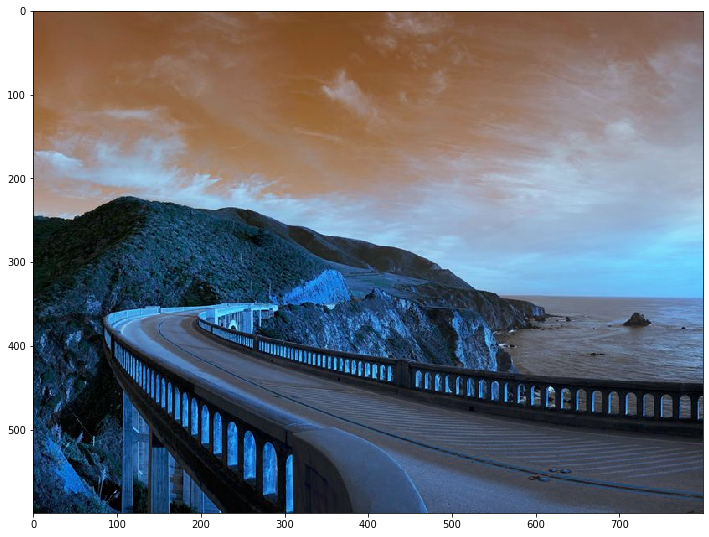

In [3]:
road = cv2.imread('../DATA/road_image.jpg')
road_copy = np.copy(road)
display(road)

In [4]:
road.shape[:2]

(600, 800)

(600, 800)
(600, 800, 3)


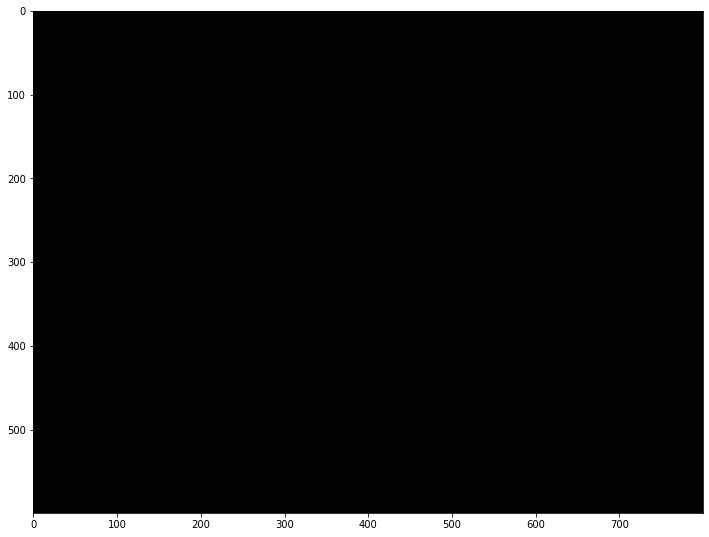

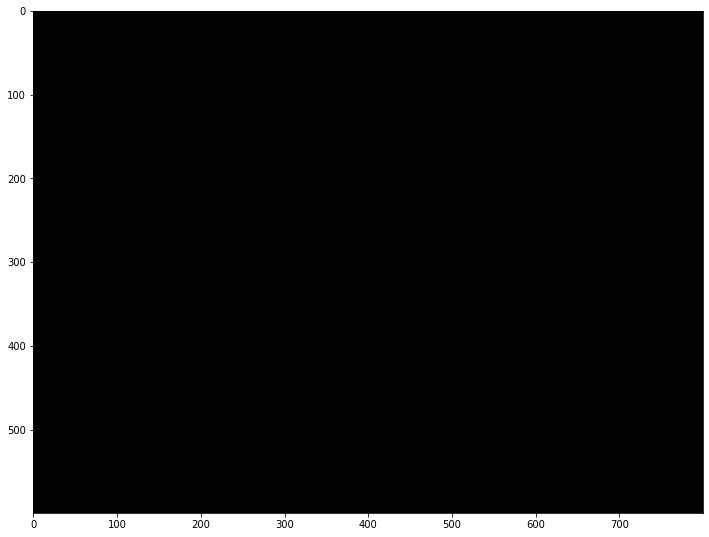

In [5]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)
segments = np.zeros(road.shape, dtype=np.uint8)
print(marker_image.shape)
print(segments.shape)
display(marker_image)
display(segments)

In [6]:
from matplotlib import cm

In [7]:
def create_rgb(i):
    return tuple(np.array(cm.tab10(i)[:3])*255)

In [8]:
colors = []
for i in range(10):
    colors.append(create_rgb(i))
print(len(colors))

10


In [9]:
## Global variables
## Color choice
n_markers = 10
current_marker = 1
## Markers updated by Watershed
marks_updated = False

In [10]:
# Callback function

def mouse_callback(event, x, y, flags, param):
    global marks_updated;
    
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_image, (x,y), 10, (current_marker), -1)
    
        cv2.circle(road_copy, (x,y), 10, colors[current_marker], -1)
        
        marks_updated = True

In [ ]:
# While true
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
        
    cv2.imshow('Watershed Segments', segments)
    cv2.imshow('Road Image', road_copy)
    
    # Close all windows
    k = cv2.waitKey(1)
    
    if k ==27:
        break;
        
    # Clearing all the colors:  
    elif k == ord('c'):
        road_copy = road.copy # np.copy equivalent
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros(road.shape, dtype=np.uint8)
        
    # Update color choice
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))
    
    if marks_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape, dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy==(color_ind)] = colors[color_ind]
        
cv2.destroyAllWindows()